In [1]:
# Importing necessary liabraries

import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout #type: ignore
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img #type: ignore
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
batch_size = 64
size = 256

In [4]:
train_datagen = ImageDataGenerator(rescale=1./255,
                             rotation_range=30,
                             shear_range=0.2,
                             zoom_range=0.2,
                            horizontal_flip=True,
                             width_shift_range=0.2,
                             height_shift_range=0.2,)

test_datagen = ImageDataGenerator(rescale= 1./255)

In [5]:
train_dataset = train_datagen.flow_from_directory(directory = r"/content/drive/MyDrive/cat_dog/train",
                                                  target_size = (256,256),
                                                  batch_size = batch_size,
                                                  class_mode = 'binary')

Found 2064 images belonging to 2 classes.


In [6]:
validation_dataset = test_datagen.flow_from_directory(directory = r"/content/drive/MyDrive/cat_dog/test",
                                               target_size = (256,256),
                                               batch_size = batch_size,
                                               class_mode = 'binary')

Found 359 images belonging to 2 classes.


In [7]:
# Creating a CNN Model

model = Sequential()

model.add(Conv2D(16,kernel_size= (3,3),padding='valid',activation='relu',input_shape=(size,size,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(32,kernel_size= (3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size= (3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size= (3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))


model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [12]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 16)      64        
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 32)      128       
 chNormalization)                                                
                                                        

In [13]:
history = model.fit(train_dataset, epochs=50, validation_data=validation_dataset)

Epoch 1/50
33/33 [==============================] - 47s 1s/step - loss: 0.9581 - accuracy: 0.5804 - val_loss: 1.8930 - val_accuracy: 0.3788
Epoch 2/50
33/33 [==============================] - 45s 1s/step - loss: 0.7842 - accuracy: 0.5707 - val_loss: 1.4300 - val_accuracy: 0.3844
Epoch 3/50
33/33 [==============================] - 45s 1s/step - loss: 0.7266 - accuracy: 0.5901 - val_loss: 1.4393 - val_accuracy: 0.3844
Epoch 4/50
33/33 [==============================] - 45s 1s/step - loss: 0.6979 - accuracy: 0.6114 - val_loss: 0.9249 - val_accuracy: 0.4429
Epoch 5/50
33/33 [==============================] - 45s 1s/step - loss: 0.6921 - accuracy: 0.6076 - val_loss: 1.0408 - val_accuracy: 0.3844
Epoch 6/50
33/33 [==============================] - 45s 1s/step - loss: 0.6629 - accuracy: 0.6245 - val_loss: 0.7889 - val_accuracy: 0.4652
Epoch 7/50
33/33 [==============================] - 45s 1s/step - loss: 0.6344 - accuracy: 0.6502 - val_loss: 0.6702 - val_accuracy: 0.6100
Epoch 8/50
33/33 [==

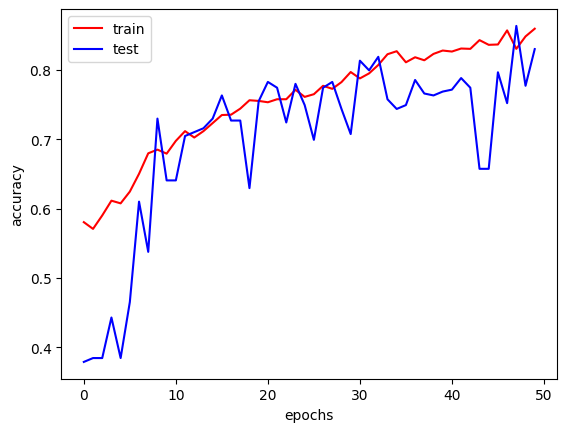

In [14]:
# plotting training and validation acuuracy of model

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='test')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

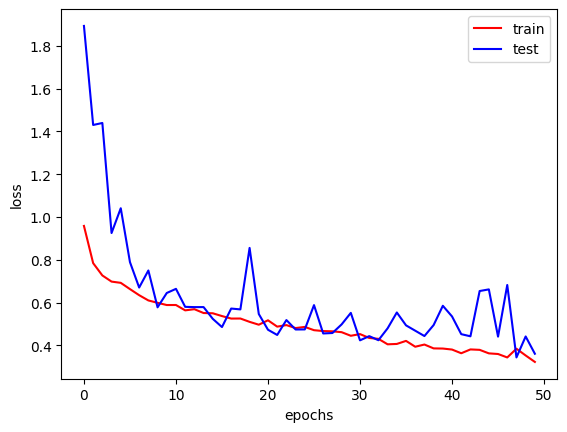

In [15]:
# plotting training and validation loss of model
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='test')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [17]:
# Predidcting on randomely Selected Test Images

number = int(input('Please Select On How Many Images on You Want to Check The Model: '))

for i in range(1,number+1):

     print(f"We are testing the randomly selected {i}-th image.")

     test_file_path = r"/content/drive/MyDrive/cat_dog/test"

     classes = os.listdir(test_file_path)

     selected_class = random.choice(classes)

     images = os.listdir(os.path.join(test_file_path,selected_class))

     selected_image = random.choice(images)

     selected_image_path = os.path.join(test_file_path, selected_class, selected_image)

     test_img = cv2.imread(selected_image_path)
     test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)

     test_img = cv2.resize(test_img,(256,256))
     test_input = test_img.reshape((1,256,256,3))
     test_input.shape



     def check_image(model_input):
         if model.predict(test_input) == 0:
              print(f'Result: The {i}-th Image is Cat Image')
         else:
              print(f'Result: The {i}-th Image is Dog Image')


     check_image(model.predict(test_input))
     plt.imshow(test_img)
     plt.show()

Output hidden; open in https://colab.research.google.com to view.